<a href="https://colab.research.google.com/github/holanda-h2/Machine-Learning/blob/main/bayes/Bayesian_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Our Mission ##

Spam detection is one of the major applications of Machine Learning in the interwebs today. Pretty much all of the major email service providers have spam detection systems built in and automatically classify such mail as 'Junk Mail'. 

A detecção de spam é uma das principais aplicações do aprendizado de máquina nas interwebs hoje. Quase todos os principais provedores de serviço de e-mail possuem sistemas de detecção de spam embutidos e classificam automaticamente esse tipo de e-mail como 'Lixo Eletrônico'.

In this mission we will be using the Naive Bayes algorithm to create a model that can classify [dataset](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) SMS messages as spam or not spam, based on the training we give to the model. It is important to have some level of intuition as to what a spammy text message might look like. Usually they have words like 'free', 'win', 'winner', 'cash', 'prize' and the like in them as these texts are designed to catch your eye and in some sense tempt you to open them. Also, spam messages tend to have words written in all capitals and also tend to use a lot of exclamation marks. To the recipient, it is usually pretty straightforward to identify a spam text and our objective here is to train a model to do that for us!

Nesta missão, usaremos o algoritmo Naive Bayes para criar um modelo que possa classificar [dataset] (https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) mensagens SMS como spam ou não spam, com base no treinamento que damos ao modelo. É importante ter algum nível de intuição sobre a aparência de uma mensagem de texto com spam. Normalmente, eles contêm palavras como 'grátis', 'ganhar', 'vencedor', 'dinheiro', 'prêmio' e semelhantes, pois esses textos são projetados para chamar sua atenção e, de alguma forma, tentá-lo a abri-los. Além disso, as mensagens de spam tendem a ter palavras escritas em maiúsculas e também tendem a usar muitos pontos de exclamação. Para o destinatário, geralmente é muito simples identificar um texto de spam e nosso objetivo aqui é treinar um modelo para fazer isso por nós!

Being able to identify spam messages is a binary classification problem as messages are classified as either 'Spam' or 'Not Spam' and nothing else. Also, this is a supervised learning problem, as we will be feeding a labelled dataset into the model, that it can learn from, to make future predictions. 

Ser capaz de identificar mensagens de spam é um problema de classificação binária, pois as mensagens são classificadas como 'Spam' ou 'Não é spam' e nada mais. Além disso, este é um problema de aprendizado supervisionado, já que alimentaremos um conjunto de dados rotulado no modelo, com o qual ele pode aprender, para fazer previsões futuras.

### Step 0: Introduction to the Naive Bayes Theorem ###

Bayes theorem is one of the earliest probabilistic inference algorithms developed by Reverend Bayes (which he used to try and infer the existence of God no less) and still performs extremely well for certain use cases. 

O teorema de Bayes é um dos primeiros algoritmos de inferência probabilística desenvolvidos pelo Reverendo Bayes (que ele usou para tentar inferir a existência de Deus nada menos) e ainda tem um desempenho extremamente bom para certos casos de uso.

It's best to understand this theorem using an example. Let's say you are a member of the Secret Service and you have been deployed to protect the Democratic presidential nominee during one of his/her campaign speeches. Being a public event that is open to all, your job is not easy and you have to be on the constant lookout for threats. So one place to start is to put a certain threat-factor for each person. So based on the features of an individual, like the age, sex, and other smaller factors like is the person carrying a bag?, does the person look nervous? etc. you can make a judgement call as to if that person is viable threat. 

É melhor entender esse teorema usando um exemplo. Digamos que você seja um membro do Serviço Secreto e tenha sido designado para proteger o candidato democrata à presidência durante um de seus discursos de campanha. Por ser um evento público aberto a todos, seu trabalho não é fácil e você tem que estar sempre alerta para as ameaças. Portanto, um lugar para começar é colocar um certo fator de ameaça para cada pessoa. Portanto, com base nas características de um indivíduo, como idade, sexo e outros fatores menores, como a pessoa carregando uma bolsa ?, a pessoa parece nervosa? etc., você pode avaliar se essa pessoa é uma ameaça viável.

If an individual ticks all the boxes up to a level where it crosses a threshold of doubt in your mind, you can take action and remove that person from the vicinity. The Bayes theorem works in the same way as we are computing the probability of an event(a person being a threat) based on the probabilities of certain related events(age, sex, presence of bag or not, nervousness etc. of the person). 

Se um indivíduo marcar todas as caixas até um nível em que cruze o limiar da dúvida em sua mente, você pode agir e remover essa pessoa da vizinhança. O teorema de Bayes funciona da mesma forma que computamos a probabilidade de um evento (uma pessoa ser uma ameaça) com base nas probabilidades de certos eventos relacionados (idade, sexo, presença de bolsa ou não, nervosismo etc. da pessoa).

One thing to consider is the independence of these features amongst each other. For example if a child looks nervous at the event then the likelihood of that person being a threat is not as much as say if it was a grown man who was nervous. To break this down a bit further, here there are two features we are considering, age AND nervousness. Say we look at these features individually, we could design a model that flags ALL persons that are nervous as potential threats. However, it is likely that we will have a lot of false positives as there is a strong chance that minors present at the event will be nervous. Hence by considering the age of a person along with the 'nervousness' feature we would definitely get a more accurate result as to who are potential threats and who aren't. 

Uma coisa a se considerar é a independência desses recursos entre si. Por exemplo, se uma criança parece nervosa com o evento, a probabilidade de essa pessoa ser uma ameaça não é tanto quanto se fosse um homem adulto que estava nervoso. Para detalhar um pouco mais, aqui estão duas características que estamos considerando, idade E nervosismo. Digamos que olhemos para esses recursos individualmente, poderíamos projetar um modelo que sinaliza TODAS as pessoas que estão nervosas como ameaças em potencial. No entanto, é provável que tenhamos muitos falsos positivos, pois há uma grande chance de que os menores presentes no evento fiquem nervosos. Conseqüentemente, considerando a idade de uma pessoa junto com o recurso de 'nervosismo', nós definitivamente obteríamos um resultado mais preciso sobre quem são ameaças potenciais e quem não são.

This is the 'Naive' bit of the theorem where it considers each feature to be independent of each other which may not always be the case and hence that can affect the final judgement.

Este é o bit 'ingênuo' do teorema, em que considera cada característica independente umas das outras, o que pode nem sempre ser o caso e, portanto, pode afetar o julgamento final.

In short, the Bayes theorem calculates the probability of a certain event happening(in our case, a message being  spam) based on the joint probabilistic distributions of certain other events(in our case, a message being classified as spam). We will dive into the workings of the Bayes theorem later in the mission, but first, let us understand the data we are going to work with.

Resumindo, o teorema de Bayes calcula a probabilidade de um determinado evento acontecer (no nosso caso, uma mensagem sendo spam) com base nas distribuições probabilísticas conjuntas de certos outros eventos (no nosso caso, uma mensagem sendo classificada como spam). Vamos mergulhar no funcionamento do teorema de Bayes mais tarde na missão, mas primeiro, vamos entender os dados com os quais vamos trabalhar.

### Step 1.1: Understanding our dataset ### 


We will be using a [dataset](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) from the UCI Machine Learning repository which has a very good collection of datasets for experimental research purposes. The direct data link is [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00228/).

Estaremos usando um [conjunto de dados] (https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) do repositório de aprendizado de máquina UCI que tem uma coleção muito boa de conjuntos de dados para fins de pesquisa experimental. O link de dados direto é [aqui] (https://archive.ics.uci.edu/ml/machine-learning-databases/00228/).

 ** Here's a preview of the data: ** 

<img src="images/dqnb.png" height="1242" width="1242">

The columns in the data set are currently not named and as you can see, there are 2 columns. 

As colunas no conjunto de dados atualmente não são nomeadas e, como você pode ver, existem 2 colunas.

The first column takes two values, 'ham' which signifies that the message is not spam, and 'spam' which signifies that the message is spam. 

A primeira coluna tem dois valores, 'ham', que significa que a mensagem não é spam, e 'spam', que significa que a mensagem é spam.

The second column is the text content of the SMS message that is being classified.

A segunda coluna é o conteúdo de texto da mensagem SMS que está sendo classificada.

>** Instructions: **
* Import the dataset into a pandas dataframe using the read_table method. Because this is a tab separated dataset we will be using '\t'
 as the value for the 'sep' argument which specifies this format. 
* Importe o conjunto de dados para um dataframe do pandas usando o método read_table. Como este é um conjunto de dados separado por tabulações, usaremos '\t'
  como o valor para o argumento 'sep' que especifica este formato.
* Also, rename the column names by specifying a list ['label, 'sms_message'] to the 'names' argument of read_table().
* Além disso, renomeie os nomes das colunas especificando uma lista ['label,'sms_message'] para o argumento 'names' de read_table().
* Print the first five values of the dataframe with the new column names.
* Imprima os primeiros cinco valores do dataframe com os novos nomes das colunas.

In [1]:
'''
Solution
'''
import pandas as pd
# Dataset from - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
df = pd.read_table('/content/SMSSpamCollection',
                   sep='\t', 
                   header=None, 
                   names=['label', 'sms_message'])

# Output printing out first 5 columns
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Step 1.2: Data Preprocessing ###

Now that we have a basic understanding of what our dataset looks like, lets convert our labels to binary variables, 0 to represent 'ham'(i.e. not spam) and 1 to represent 'spam' for ease of computation. 

Agora que temos uma compreensão básica da aparência de nosso conjunto de dados, vamos converter nossos rótulos em variáveis binárias, 0 para representar 'ham' (ou seja, não é spam) e 1 para representar 'spam' para facilitar o cálculo.

You might be wondering why do we need to do this step? The answer to this lies in how scikit-learn handles inputs. Scikit-learn only deals with numerical values and hence if we were to leave our label values as strings, scikit-learn would do the conversion internally(more specifically, the string labels will be cast to unknown float values). 

Você pode estar se perguntando por que precisamos realizar esta etapa? A resposta para isso está em como o scikit-learn trata as entradas. O Scikit-learn lida apenas com valores numéricos e, portanto, se deixarmos nossos valores de rótulo como strings, o scikit-learn faria a conversão internamente (mais especificamente, os rótulos de string serão convertidos em valores flutuantes desconhecidos).

Our model would still be able to make predictions if we left our labels as strings but we could have issues later when calculating performance metrics, for example when calculating our precision and recall scores. Hence, to avoid unexpected 'gotchas' later, it is good practice to have our categorical values be fed into our model as integers.

Nosso modelo ainda seria capaz de fazer previsões se deixássemos nossos rótulos como strings, mas poderíamos ter problemas mais tarde ao calcular as métricas de desempenho, por exemplo, ao calcular nossas pontuações de precisão e recall. Portanto, para evitar 'pegadinhas' inesperadas posteriormente, é uma boa prática alimentar nossos valores categóricos em nosso modelo como inteiros.

>**Instructions: **
* Convert the values in the 'label' column to numerical values using map method as follows:
{'ham':0, 'spam':1} This maps the 'ham' value to 0 and the 'spam' value to 1.
* Converta os valores na coluna 'rótulo' em valores numéricos usando o método de mapa da seguinte forma:
{'ham': 0, 'spam': 1} Isso mapeia o valor 'ham' para 0 e o valor 'spam' para 1.
* Also, to get an idea of the size of the dataset we are dealing with, print out number of rows and columns using 
'shape'.
* Além disso, para ter uma ideia do tamanho do conjunto de dados com o qual estamos lidando, imprima o número de linhas e colunas usando
'shape'.

In [2]:
'''
Solution
'''
df['label'] = df.label.map({'ham':0, 'spam':1})
print(df.shape)
df.head() # returns (rows, columns)

(5572, 2)


,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Step 2.1: Bag of words ###

What we have here in our data set is a large collection of text data (5,572 rows of data). Most ML algorithms rely on numerical data to be fed into them as input, and email/sms messages are usually text heavy. 

O que temos aqui em nosso conjunto de dados é uma grande coleção de dados de texto (5.572 linhas de dados). A maioria dos algoritmos de ML depende de dados numéricos para serem alimentados como entrada, e as mensagens de e-mail / sms geralmente têm muito texto.

Here we'd like to introduce the Bag of Words(BoW) concept which is a term used to specify the problems that have a 'bag of words' or a collection of text data that needs to be worked with. The basic idea of BoW is to take a piece of text and count the frequency of the words in that text. It is important to note that the BoW concept treats each word individually and the order in which the words occur does not matter. 

Aqui, gostaríamos de apresentar o conceito de Bag of Words (BoW), que é um termo usado para especificar os problemas que têm uma 'bolsa de palavras' ou uma coleção de dados de texto que precisam ser trabalhados. A ideia básica do BoW é pegar um pedaço de texto e contar a frequência das palavras nesse texto. É importante notar que o conceito BoW trata cada palavra individualmente e a ordem em que as palavras ocorrem não importa.

Using a process which we will go through now, we can covert a collection of documents to a matrix, with each document being a row and each word(token) being the column, and the corresponding (row,column) values being the frequency of occurrence of each word or token in that document.

Usando um processo pelo qual passaremos agora, podemos converter uma coleção de documentos em uma matriz, com cada documento sendo uma linha e cada palavra (token) sendo a coluna, e os valores correspondentes (linha, coluna) sendo a frequência de ocorrência de cada palavra ou token naquele documento.

For example: 

Lets say we have 4 documents as follows:
Digamos que temos 4 documentos da seguinte forma:

`['Hello, how are you!',
'Win money, win from home.',
'Call me now',
'Hello, Call you tomorrow?']`

Our objective here is to convert this set of text to a frequency distribution matrix, as follows:

Nosso objetivo aqui é converter este conjunto de texto em uma matriz de distribuição de frequência, da seguinte maneira:

<img src="images/countvectorizer.png" height="542" width="542">

Here as we can see, the documents are numbered in the rows, and each word is a column name, with the corresponding value being the frequency of that word in the document.

Aqui, como podemos ver, os documentos são numerados nas linhas, e cada palavra é um nome de coluna, com o valor correspondente sendo a frequência dessa palavra no documento.

Lets break this down and see how we can do this conversion using a small set of documents.

Vamos analisar isso e ver como podemos fazer essa conversão usando um pequeno conjunto de documentos.

To handle this, we will be using sklearns 
[count vectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) method which does the following:

* It tokenizes the string(separates the string into individual words) and gives an integer ID to each token.
* Ele simboliza a string (separa a string em palavras individuais) e fornece um ID inteiro para cada token.
* It counts the occurrence of each of those tokens.
* Conta a ocorrência de cada um desses tokens.

** Please Note: ** 

* The CountVectorizer method automatically converts all tokenized words to their lower case form so that it does not treat words like 'He' and 'he' differently. It does this using the `lowercase` parameter which is by default set to `True`.

* O método CountVectorizer converte automaticamente todas as palavras tokenizadas em minúsculas para que não trate palavras como 'Ele' e 'ele' de forma diferente. Ele faz isso usando o parâmetro `lowercase` que por padrão é definido como` True`.

* It also ignores all punctuation so that words followed by a punctuation mark (for example: 'hello!') are not treated differently than the same words not prefixed or suffixed by a punctuation mark (for example: 'hello'). It does this using the `token_pattern` parameter which has a default regular expression which selects tokens of 2 or more alphanumeric characters.

* Ele também ignora toda a pontuação para que as palavras seguidas por um sinal de pontuação (por exemplo: 'olá!') Não sejam tratadas de forma diferente das mesmas palavras sem prefixo ou sufixo de um sinal de pontuação (por exemplo: 'olá'). Ele faz isso usando o parâmetro `token_pattern`, que possui uma expressão regular padrão que seleciona tokens de 2 ou mais caracteres alfanuméricos.

* The third parameter to take note of is the `stop_words` parameter. Stop words refer to the most commonly used words in a language. They include words like 'am', 'an', 'and', 'the' etc. By setting this parameter value to `english`, CountVectorizer will automatically ignore all words(from our input text) that are found in the built in list of english stop words in scikit-learn. This is extremely helpful as stop words can skew our calculations when we are trying to find certain key words that are indicative of spam.

* O terceiro parâmetro a ser observado é o parâmetro `stop_words`. Palavras irrelevantes referem-se às palavras mais comumente usadas em um idioma. Eles incluem palavras como 'sou', 'um', 'e', 'o' etc. Ao definir este valor de parâmetro para `inglês`, CountVectorizer irá automaticamente ignorar todas as palavras (de nosso texto de entrada) que são encontradas no embutido lista de palavras de interrupção em inglês no scikit-learn. Isso é extremamente útil, pois as palavras irrelevantes podem distorcer nossos cálculos quando tentamos encontrar certas palavras-chave indicativas de spam.

We will dive into the application of each of these into our model in a later step, but for now it is important to be aware of such preprocessing techniques available to us when dealing with textual data.

Vamos mergulhar na aplicação de cada um deles em nosso modelo em uma etapa posterior, mas por enquanto é importante estar ciente de tais técnicas de pré-processamento disponíveis para nós quando lidamos com dados textuais.

### Step 2.2: Implementing Bag of Words from scratch ###

Before we dive into scikit-learn's Bag of Words(BoW) library to do the dirty work for us, let's implement it ourselves first so that we can understand what's happening behind the scenes. 

Antes de mergulharmos na biblioteca Bag of Words (BoW) do scikit-learn para fazer o trabalho sujo para nós, vamos implementá-la primeiro para que possamos entender o que está acontecendo nos bastidores.

** Step 1: Convert all strings to their lower case form. **

Let's say we have a document set:

```
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']
```
>>** Instructions: **
* Convert all the strings in the documents set to their lower case. Save them into a list called 'lower_case_documents'. You can convert strings to their lower case in python by using the lower() method.
* Converta todas as strings nos documentos definidos para minúsculas. Salve-os em uma lista chamada 'lower_case_documents'. Você pode converter strings para minúsculas em python usando o método lower ().

In [3]:
'''
Solution:
'''
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

lower_case_documents = []
for i in documents:
    lower_case_documents.append(i.lower())
print(lower_case_documents)

['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


** Step 2: Removing all punctuations **

>>**Instructions: **
Remove all punctuation from the strings in the document set. Save them into a list called 
'sans_punctuation_documents'. 

In [4]:
'''
Solution:
'''
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans('', '', string.punctuation)))
print(sans_punctuation_documents)

['hello how are you', 'win money win from home', 'call me now', 'hello call hello you tomorrow']


** Step 3: Tokenization **

Tokenizing a sentence in a document set means splitting up a sentence into individual words using a delimiter. The delimiter specifies what character we will use to identify the beginning and the end of a word(for example we could use a single space as the delimiter for identifying words in our document set.)

Tokenizar uma frase em um conjunto de documentos significa dividir uma frase em palavras individuais usando um delimitador. O delimitador especifica qual caractere usaremos para identificar o início e o fim de uma palavra (por exemplo, podemos usar um único espaço como delimitador para identificar palavras em nosso conjunto de documentos).

>>**Instructions:**
Tokenize the strings stored in 'sans_punctuation_documents' using the split() method. and store the final document set 
in a list called 'preprocessed_documents'.


In [5]:
'''
Solution:
'''
preprocessed_documents = []
for i in sans_punctuation_documents:
    preprocessed_documents.append(i.split(' '))
print(preprocessed_documents)

[['hello', 'how', 'are', 'you'], ['win', 'money', 'win', 'from', 'home'], ['call', 'me', 'now'], ['hello', 'call', 'hello', 'you', 'tomorrow']]


** Step 4: Count frequencies **

Now that we have our document set in the required format, we can proceed to counting the occurrence of each word in each document of the document set. We will use the `Counter` method from the Python `collections` library for this purpose. 

Agora que temos nosso documento configurado no formato requerido, podemos prosseguir com a contagem da ocorrência de cada palavra em cada documento do conjunto de documentos. Usaremos o método `Counter` da biblioteca de` coleções` do Python para este propósito.

`Counter` counts the occurrence of each item in the list and returns a dictionary with the key as the item being counted and the corresponding value being the count of that item in the list. 

`Contador` conta a ocorrência de cada item na lista e retorna um dicionário com a chave como o item sendo contado e o valor correspondente sendo a contagem desse item na lista.

>>**Instructions:**
Using the Counter() method and preprocessed_documents as the input, create a dictionary with the keys being each word in each document and the corresponding values being the frequncy of occurrence of that word. Save each Counter dictionary as an item in a list called 'frequency_list'.


In [6]:
'''
Solution
'''
frequency_list = []
import pprint
from collections import Counter

for i in preprocessed_documents:
    frequency_counts = Counter(i)
    frequency_list.append(frequency_counts)
    
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


Congratulations! You have implemented the Bag of Words process from scratch! As we can see in our previous output, we have a frequency distribution dictionary which gives a clear view of the text that we are dealing with.

Parabéns! Você implementou o processo Saco de Palavras do zero! Como podemos ver em nossa saída anterior, temos um dicionário de distribuição de frequência que dá uma visão clara do texto com o qual estamos lidando.

We should now have a solid understanding of what is happening behind the scenes in the `sklearn.feature_extraction.text.CountVectorizer` method of scikit-learn. 

Agora devemos ter uma compreensão sólida do que está acontecendo nos bastidores no método `sklearn.feature_extraction.text.CountVectorizer` de scikit-learn.

We will now implement `sklearn.feature_extraction.text.CountVectorizer` method in the next step.

### Step 2.3: Implementing Bag of Words in scikit-learn ###

Now that we have implemented the BoW concept from scratch, let's go ahead and use scikit-learn to do this process in a clean and succinct way. We will use the same document set as we used in the previous step. 

Agora que implementamos o conceito BoW do zero, vamos usar o scikit-learn para fazer esse processo de maneira limpa e sucinta. Usaremos o mesmo conjunto de documentos usado na etapa anterior.

In [7]:
'''
Here we will look to create a frequency matrix on a smaller document set to make sure we understand how the 
document-term matrix generation happens. We have created a sample document set 'documents'.
'''
documents = ['Hello, how are you!',
                'Win money, win from home.',
                'Call me now.',
                'Hello, Call hello you tomorrow?']

>>**Instructions:**
Import the sklearn.feature_extraction.text.CountVectorizer method and create an instance of it called 'count_vector'. 

In [8]:
'''
Solution
'''
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

** Data preprocessing with CountVectorizer() **

In Step 2.2, we implemented a version of the CountVectorizer() method from scratch that entailed cleaning our data first. This cleaning involved converting all of our data to lower case and removing all punctuation marks. CountVectorizer() has certain parameters which take care of these steps for us. They are:

Na Etapa 2.2, implementamos uma versão do método CountVectorizer () do zero que envolvia a limpeza de nossos dados primeiro. Essa limpeza envolveu a conversão de todos os nossos dados em letras minúsculas e a remoção de todas as marcas de pontuação. CountVectorizer () tem certos parâmetros que cuidam dessas etapas para nós. Eles são:

* `lowercase = True`
    
    The `lowercase` parameter has a default value of `True` which converts all of our text to its lower case form.


* `token_pattern = (?u)\\b\\w\\w+\\b`
    
    The `token_pattern` parameter has a default regular expression value of `(?u)\\b\\w\\w+\\b` which ignores all punctuation marks and treats them as delimiters, while accepting alphanumeric strings of length greater than or equal to 2, as individual tokens or words.


* `stop_words`

    The `stop_words` parameter, if set to `english` will remove all words from our document set that match a list of English stop words which is defined in scikit-learn. Considering the size of our dataset and the fact that we are dealing with SMS messages and not larger text sources like e-mail, we will not be setting this parameter value.

    O parâmetro `stop_words`, se definido como` english` irá remover todas as palavras de nosso conjunto de documentos que correspondem a uma lista de palavras de parada em inglês que é definida no scikit-learn. Considerando o tamanho de nosso conjunto de dados e o fato de que estamos lidando com mensagens SMS e não fontes de texto maiores como e-mail, não definiremos este valor de parâmetro.

You can take a look at all the parameter values of your `count_vector` object by simply printing out the object as follows:

Você pode dar uma olhada em todos os valores de parâmetro do seu objeto `count_vector` simplesmente imprimindo o objeto da seguinte forma:

In [9]:
'''
Practice node:
Print the 'count_vector' object which is an instance of 'CountVectorizer()'
'''
print(count_vector)

CountVectorizer()


>>**Instructions:**
Fit your document dataset to the CountVectorizer object you have created using fit(), and get the list of words 
which have been categorized as features using the get_feature_names() method.

Ajuste o conjunto de dados do documento ao objeto CountVectorizer que você criou usando fit () e obtenha a lista de palavras
que foram categorizados como recursos usando o método get_feature_names ().

In [10]:
'''
Solution:
'''
count_vector.fit(documents)
count_vector.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['are',
 'call',
 'from',
 'hello',
 'home',
 'how',
 'me',
 'money',
 'now',
 'tomorrow',
 'win',
 'you']

The `get_feature_names()` method returns our feature names for this dataset, which is the set of words that make up our vocabulary for 'documents'.

>>**
Instructions:**
Create a matrix with the rows being each of the 4 documents, and the columns being each word. 
The corresponding (row, column) value is the frequency of occurrence of that word(in the column) in a particular
document(in the row). You can do this using the transform() method and passing in the document data set as the 
argument. The transform() method returns a matrix of numpy integers, you can convert this to an array using
toarray(). Call the array 'doc_array'

Crie uma matriz com as linhas sendo cada um dos 4 documentos e as colunas sendo cada palavra.
O valor correspondente (linha, coluna) é a frequência de ocorrência dessa palavra (na coluna) em um determinado
documento (na linha). Você pode fazer isso usando o método transform () e passando o conjunto de dados do documento como o
argumento. O método transform () retorna uma matriz de números inteiros, você pode convertê-la em uma matriz usando
toarray (). Chame a matriz 'doc_array'


In [11]:
'''
Solution
'''
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]])

Now we have a clean representation of the documents in terms of the frequency distribution of the words in them. To make it easier to understand our next step is to convert this array into a dataframe and name the columns appropriately.

Agora temos uma representação clara dos documentos em termos da distribuição de frequência das palavras neles. Para facilitar o entendimento, nossa próxima etapa é converter esse array em um dataframe e nomear as colunas de maneira apropriada.

>>**Instructions:**
Convert the array we obtained, loaded into 'doc_array', into a dataframe and set the column names to 
the word names(which you computed earlier using get_feature_names(). Call the dataframe 'frequency_matrix'.


In [12]:
'''
Solution
'''
frequency_matrix = pd.DataFrame(doc_array, 
                                columns = count_vector.get_feature_names())
frequency_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


Congratulations! You have successfully implemented a Bag of Words problem for a document dataset that we created. 

Parabéns! Você implementou com êxito um problema Bag of Words para um conjunto de dados de documento que criamos.

One potential issue that can arise from using this method out of the box is the fact that if our dataset of text is extremely large(say if we have a large collection of news articles or email data), there will be certain values that are more common that others simply due to the structure of the language itself. So for example words like 'is', 'the', 'an', pronouns, grammatical constructs etc could skew our matrix and affect our analyis. 

Um problema potencial que pode surgir do uso desse método pronto para uso é o fato de que, se nosso conjunto de dados de texto for extremamente grande (digamos, se tivermos uma grande coleção de artigos de notícias ou dados de e-mail), haverá certos valores que são mais comum que outros simplesmente devido à própria estrutura da língua. Assim, por exemplo, palavras como 'é', 'o', 'uma', pronomes, construções gramaticais, etc. podem distorcer nossa matriz e afetar nossa análise.

There are a couple of ways to mitigate this. One way is to use the `stop_words` parameter and set its value to `english`. This will automatically ignore all words(from our input text) that are found in a built in list of English stop words in scikit-learn.

Existem algumas maneiras de atenuar isso. Uma maneira é usar o parâmetro `stop_words` e definir seu valor para` inglês`. Isso irá ignorar automaticamente todas as palavras (do nosso texto de entrada) que são encontradas em uma lista integrada de palavras de parada em inglês no scikit-learn.

Another way of mitigating this is by using the [tfidf](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer) method. This method is out of scope for the context of this lesson.

### Step 3.1: Training and testing sets ###

Now that we have understood how to deal with the Bag of Words problem we can get back to our dataset and proceed with our analysis. Our first step in this regard would be to split our dataset into a training and testing set so we can test our model later. 

Agora que entendemos como lidar com o problema do Saco de Palavras, podemos voltar ao nosso conjunto de dados e prosseguir com nossa análise. Nossa primeira etapa a esse respeito seria dividir nosso conjunto de dados em um conjunto de treinamento e teste para que possamos testar nosso modelo mais tarde.


>>**Instructions:**
Split the dataset into a training and testing set by using the train_test_split method in sklearn. Split the data
using the following variables:
* `X_train` is our training data for the 'sms_message' column.
* `y_train` is our training data for the 'label' column
* `X_test` is our testing data for the 'sms_message' column.
* `y_test` is our testing data for the 'label' column
Print out the number of rows we have in each our training and testing data.


In [13]:
'''
Solution

NOTE: sklearn.cross_validation will be deprecated soon to sklearn.model_selection 
'''
# split into training and testing sets
# USE from sklearn.model_selection import train_test_split to avoid seeing deprecation warning.
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


### Step 3.2: Applying Bag of Words processing to our dataset. ###

Now that we have split the data, our next objective is to follow the steps from Step 2: Bag of words and convert our data into the desired matrix format. To do this we will be using CountVectorizer() as we did before. There are two  steps to consider here:

* Firstly, we have to fit our training data (`X_train`) into `CountVectorizer()` and return the matrix.
* Secondly, we have to transform our testing data (`X_test`) to return the matrix. 

Note that `X_train` is our training data for the 'sms_message' column in our dataset and we will be using this to train our model. 

`X_test` is our testing data for the 'sms_message' column and this is the data we will be using(after transformation to a matrix) to make predictions on. We will then compare those predictions with `y_test` in a later step. 

For now, we have provided the code that does the matrix transformations for you!

In [14]:
'''
[Practice Node]

The code for this segment is in 2 parts. Firstly, we are learning a vocabulary dictionary for the training data 
and then transforming the data into a document-term matrix; secondly, for the testing data we are only 
transforming the data into a document-term matrix.

This is similar to the process we followed in Step 2.3

We will provide the transformed data to students in the variables 'training_data' and 'testing_data'.
'''

"\n[Practice Node]\n\nThe code for this segment is in 2 parts. Firstly, we are learning a vocabulary dictionary for the training data \nand then transforming the data into a document-term matrix; secondly, for the testing data we are only \ntransforming the data into a document-term matrix.\n\nThis is similar to the process we followed in Step 2.3\n\nWe will provide the transformed data to students in the variables 'training_data' and 'testing_data'.\n"

In [15]:
'''
Solution
'''
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

### Step 4.1: Bayes Theorem implementation from scratch ###

Now that we have our dataset in the format that we need, we can move onto the next portion of our mission which is the  algorithm we will use to make our predictions to classify a message as spam or not spam. Remember that at the start of the mission we briefly discussed the Bayes theorem but now we shall go into a little more detail. In layman's terms, the Bayes theorem calculates the probability of an event occurring, based on certain other probabilities that are related to the event in question. It is  composed of a  prior(the probabilities that we are aware of or that is given to us) and the posterior(the probabilities we are looking to compute using the priors). 

Agora que temos nosso conjunto de dados no formato que precisamos, podemos passar para a próxima parte de nossa missão, que é o algoritmo que usaremos para fazer nossas previsões para classificar uma mensagem como spam ou não spam. Lembre-se de que, no início da missão, discutimos brevemente o teorema de Bayes, mas agora entraremos em mais detalhes. Em termos leigos, o teorema de Bayes calcula a probabilidade de um evento ocorrer, com base em certas outras probabilidades relacionadas ao evento em questão. É composto por um prior (as probabilidades de que temos conhecimento ou que nos são dados) e um posterior (as probabilidades que pretendemos calcular usando os antecedentes).

Let us implement the Bayes Theorem from scratch using a simple example. Let's say we are trying to find the odds of an individual having diabetes, given that he or she was tested for it and got a positive result. 

Vamos implementar o Teorema de Bayes do zero usando um exemplo simples. Digamos que estejamos tentando encontrar as chances de um indivíduo ter diabetes, visto que ele foi testado e obteve um resultado positivo.

In the medical field, such probabilies play a very important role as it usually deals with life and death situations. 

No campo médico, tais probabilidades desempenham um papel muito importante, pois geralmente tratam de situações de vida ou morte.

We assume the following:

`P(D)` is the probability of a person having Diabetes. It's value is `0.01` or in other words, 1% of the general population has diabetes(Disclaimer: these values are assumptions and are not reflective of any medical study).

`P(Pos)` is the probability of getting a positive test result.

`P(Neg)` is the probability of getting a negative test result.

`P(Pos|D)` is the probability of getting a positive result on a test done for detecting diabetes, given that you have diabetes. This has a value `0.9`. In other words the test is correct 90% of the time. This is also called the Sensitivity or True Positive Rate.
Isso também é chamado de Sensibilidade ou Taxa de Positivo Verdadeiro.

`P(Neg|~D)` is the probability of getting a negative result on a test done for detecting diabetes, given that you do not have diabetes. This also has a value of `0.9` and is therefore correct, 90% of the time. This is also called the Specificity or True Negative Rate.
Isso também é chamado de Especificidade ou Taxa Negativa Verdadeira.

The Bayes formula is as follows:

<img src="images/bayes_formula.png" height="242" width="242">

* `P(A)` is the prior probability of A occurring independently. In our example this is `P(D)`. This value is given to us.

* `P(B)` is the prior probability of B occurring independently. In our example this is `P(Pos)`.

* `P(A|B)` is the posterior probability that A occurs given B. In our example this is `P(D|Pos)`. That is, **the probability of an individual having diabetes, given that, that individual got a positive test result. This is the value that we are looking to calculate.**

* `P(B|A)` is the likelihood probability of B occurring, given A. In our example this is `P(Pos|D)`. This value is given to us.

Putting our values into the formula for Bayes theorem we get:

`P(D|Pos) = (P(D) * P(Pos|D) / P(Pos)`

The probability of getting a positive test result `P(Pos)` can be calculated using the Sensitivity and Specificity as follows:

`P(Pos) = [P(D) * Sensitivity] + [P(~D) * (1-Specificity))]`

In [16]:
'''
Instructions:
Calculate probability of getting a positive test result, P(Pos)
'''

'\nInstructions:\nCalculate probability of getting a positive test result, P(Pos)\n'

In [17]:
'''
Solution (skeleton code will be provided)
'''
# P(D)
p_diabetes = 0.01

# P(~D)
p_no_diabetes = 0.99

# Sensitivity or P(Pos|D)
p_pos_diabetes = 0.9

# Specificity or P(Neg/~D)
p_neg_no_diabetes = 0.9

# P(Pos)
p_pos = (p_diabetes * p_pos_diabetes) + (p_no_diabetes * (1 - p_neg_no_diabetes))
print('The probability of getting a positive test result P(Pos) is: {}',format(p_pos))

The probability of getting a positive test result P(Pos) is: {} 0.10799999999999998


** Using all of this information we can calculate our posteriors as follows: **
    
The probability of an individual having diabetes, given that, that individual got a positive test result:

`P(D/Pos) = (P(D) * Sensitivity)) / P(Pos)`

The probability of an individual not having diabetes, given that, that individual got a positive test result:

`P(~D/Pos) = (P(~D) * (1-Specificity)) / P(Pos)`

The sum of our posteriors will always equal `1`. 

In [18]:
'''
Instructions:
Compute the probability of an individual having diabetes, given that, that individual got a positive test result.
In other words, compute P(D|Pos).

The formula is: P(D|Pos) = (P(D) * P(Pos|D) / P(Pos)
'''

'\nInstructions:\nCompute the probability of an individual having diabetes, given that, that individual got a positive test result.\nIn other words, compute P(D|Pos).\n\nThe formula is: P(D|Pos) = (P(D) * P(Pos|D) / P(Pos)\n'

In [19]:
'''
Solution
'''
# P(D|Pos)
p_diabetes_pos = (p_diabetes * p_pos_diabetes) / p_pos
print('Probability of an individual having diabetes, given that that individual got a positive test result is:\
',format(p_diabetes_pos)) 

Probability of an individual having diabetes, given that that individual got a positive test result is: 0.08333333333333336


In [20]:
'''
Instructions:
Compute the probability of an individual not having diabetes, given that, that individual got a positive test result.
In other words, compute P(~D|Pos).

The formula is: P(~D|Pos) = (P(~D) * P(Pos|~D) / P(Pos)

Note that P(Pos/~D) can be computed as 1 - P(Neg/~D). 

Therefore:
P(Pos/~D) = p_pos_no_diabetes = 1 - 0.9 = 0.1
'''

'\nInstructions:\nCompute the probability of an individual not having diabetes, given that, that individual got a positive test result.\nIn other words, compute P(~D|Pos).\n\nThe formula is: P(~D|Pos) = (P(~D) * P(Pos|~D) / P(Pos)\n\nNote that P(Pos/~D) can be computed as 1 - P(Neg/~D). \n\nTherefore:\nP(Pos/~D) = p_pos_no_diabetes = 1 - 0.9 = 0.1\n'

In [21]:
'''
Solution
'''
# P(Pos/~D)
p_pos_no_diabetes = 0.1

# P(~D|Pos)
p_no_diabetes_pos = (p_no_diabetes * p_pos_no_diabetes) / p_pos
print('Probability of an individual not having diabetes, given that that individual got a positive test result is: {}',format(p_no_diabetes_pos))

Probability of an individual not having diabetes, given that that individual got a positive test result is: {} 0.9166666666666669


Congratulations! You have implemented Bayes theorem from scratch. Your analysis shows that even if you get a positive test result, there is only a 8.3% chance that you actually have diabetes and a 91.67% chance that you do not have diabetes. This is of course assuming that only 1% of the entire population has diabetes which of course is only an assumption.

Parabéns! Você implementou o teorema de Bayes do zero. Sua análise mostra que mesmo se você obtiver um resultado positivo no teste, há apenas 8,3% de chance de você realmente ter diabetes e 91,67% de chance de não ter diabetes. É claro que isso pressupõe que apenas 1% de toda a população tem diabetes, o que, obviamente, é apenas uma suposição.

** What does the term 'Naive' in 'Naive Bayes' mean ? ** 

The term 'Naive' in Naive Bayes comes from the fact that the algorithm considers the features that it is using to make the predictions to be independent of each other, which may not always be the case. So in our Diabetes example, we are considering only one feature, that is the test result. Say we added another feature, 'exercise'. Let's say this feature has a binary value of `0` and `1`, where the former signifies that the individual exercises less than or equal to 2 days a week and the latter signifies that the individual exercises greater than or equal to 3 days a week. If we had to use both of these features, namely the test result and the value of the 'exercise' feature, to compute our final probabilities, Bayes' theorem would fail. Naive Bayes' is an extension of Bayes' theorem that assumes that all the features are independent of each other. 

O termo 'Naive' em Naive Bayes vem do fato de que o algoritmo considera os recursos que está usando para fazer as previsões como independentes uns dos outros, o que pode nem sempre ser o caso. Portanto, em nosso exemplo do Diabetes, estamos considerando apenas um recurso, que é o resultado do teste. Digamos que adicionamos outro recurso, 'exercício'. Digamos que este recurso tenha um valor binário de `0` e` 1`, onde o primeiro significa que o indivíduo se exercita menor ou igual a 2 dias por semana e o último significa que o indivíduo se exercita maior ou igual a 3 dias a semana. Se tivéssemos que usar esses dois recursos, ou seja, o resultado do teste e o valor do recurso 'exercício', para calcular nossas probabilidades finais, o teorema de Bayes falharia. Naive Bayes 'é uma extensão do teorema de Bayes que assume que todas as características são independentes umas das outras.

### Step 4.2: Naive Bayes implementation from scratch ###



Now that you have understood the ins and outs of Bayes Theorem, we will extend it to consider cases where we have more than one feature. 

Agora que você entendeu os meandros do Teorema de Bayes, vamos estendê-lo para considerar os casos em que temos mais de um recurso.

Let's say that we have two political parties' candidates, 'Jill Stein' of the Green Party and 'Gary Johnson' of the Libertarian Party and we have the probabilities of each of these candidates saying the words 'freedom', 'immigration' and 'environment' when they give a speech:

Digamos que temos dois candidatos de partidos políticos, 'Jill Stein' do Partido Verde e 'Gary Johnson' do Partido Libertário e temos as probabilidades de cada um desses candidatos dizer as palavras 'liberdade', 'imigração' e ' ambiente 'quando fazem um discurso:

* Probability that Jill Stein says 'freedom': 0.1 ---------> `P(F|J)`
* Probability that Jill Stein says 'immigration': 0.1 -----> `P(I|J)`
* Probability that Jill Stein says 'environment': 0.8 -----> `P(E|J)`


* Probability that Gary Johnson says 'freedom': 0.7 -------> `P(F|G)`
* Probability that Gary Johnson says 'immigration': 0.2 ---> `P(I|G)`
* Probability that Gary Johnson says 'environment': 0.1 ---> `P(E|G)`


And let us also assume that the probability of Jill Stein giving a speech, `P(J)` is `0.5` and the same for Gary Johnson, `P(G) = 0.5`. 


Given this, what if we had to find the probabilities of Jill Stein saying the words 'freedom' and 'immigration'? This is where the Naive Bayes'theorem comes into play as we are considering two features, 'freedom' and 'immigration'.

Now we are at a place where we can define the formula for the Naive Bayes' theorem:

<img src="images/naivebayes.png" height="342" width="342">

Here, `y` is the class variable or in our case the name of the candidate and `x1` through `xn` are the feature vectors or in our case the individual words. The theorem makes the assumption that each of the feature vectors or words (`xi`) are independent of each other.

To break this down, we have to compute the following posterior probabilities:

* `P(J|F,I)`: Probability of Jill Stein saying the words Freedom and Immigration. 

    Using the formula and our knowledge of Bayes' theorem, we can compute this as follows: `P(J|F,I)` = `(P(J) * P(F|J) * P(I|J)) / P(F,I)`. Here `P(F,I)` is the probability of the words 'freedom' and 'immigration' being said in a speech.
    

* `P(G|F,I)`: Probability of Gary Johnson saying the words Freedom and Immigration.  
    
    Using the formula, we can compute this as follows: `P(G|F,I)` = `(P(G) * P(F|G) * P(I|G)) / P(F,I)`

In [22]:
'''
Instructions: Compute the probability of the words 'freedom' and 'immigration' being said in a speech, or
P(F,I).

The first step is multiplying the probabilities of Jill Stein giving a speech with her individual 
probabilities of saying the words 'freedom' and 'immigration'. Store this in a variable called p_j_text

The second step is multiplying the probabilities of Gary Johnson giving a speech with his individual 
probabilities of saying the words 'freedom' and 'immigration'. Store this in a variable called p_g_text

The third step is to add both of these probabilities and you will get P(F,I).
'''

"\nInstructions: Compute the probability of the words 'freedom' and 'immigration' being said in a speech, or\nP(F,I).\n\nThe first step is multiplying the probabilities of Jill Stein giving a speech with her individual \nprobabilities of saying the words 'freedom' and 'immigration'. Store this in a variable called p_j_text\n\nThe second step is multiplying the probabilities of Gary Johnson giving a speech with his individual \nprobabilities of saying the words 'freedom' and 'immigration'. Store this in a variable called p_g_text\n\nThe third step is to add both of these probabilities and you will get P(F,I).\n"

In [23]:
'''
Solution: Step 1
'''
# P(J)
p_j = 0.5

# P(F/J)
p_j_f = 0.1

# P(I/J)
p_j_i = 0.1

p_j_text = p_j * p_j_f * p_j_i
print(p_j_text)

0.005000000000000001


In [24]:
'''
Solution: Step 2
'''
# P(G)
p_g = 0.5

# P(F/G)
p_g_f = 0.7

# P(I/G)
p_g_i = 0.2

p_g_text = p_g * p_g_f * p_g_i
print(p_g_text)

0.06999999999999999


In [25]:
'''
Solution: Step 3: Compute P(F,I) and store in p_f_i
'''
p_f_i = p_j_text + p_g_text
print('Probability of words freedom and immigration being said are: ', format(p_f_i))

Probability of words freedom and immigration being said are:  0.075


Now we can compute the probability of `P(J|F,I)`, that is the probability of Jill Stein saying the words Freedom and Immigration and `P(G|F,I)`, that is the probability of Gary Johnson saying the words Freedom and Immigration.

In [26]:
'''
Instructions:
Compute P(J|F,I) using the formula P(J|F,I) = (P(J) * P(F|J) * P(I|J)) / P(F,I) and store it in a variable p_j_fi
'''

'\nInstructions:\nCompute P(J|F,I) using the formula P(J|F,I) = (P(J) * P(F|J) * P(I|J)) / P(F,I) and store it in a variable p_j_fi\n'

In [27]:
'''
Solution
'''
p_j_fi = p_j_text / p_f_i
print('The probability of Jill Stein saying the words Freedom and Immigration: ', format(p_j_fi))

The probability of Jill Stein saying the words Freedom and Immigration:  0.06666666666666668


In [28]:
'''
Instructions:
Compute P(G|F,I) using the formula P(G|F,I) = (P(G) * P(F|G) * P(I|G)) / P(F,I) and store it in a variable p_g_fi
'''

'\nInstructions:\nCompute P(G|F,I) using the formula P(G|F,I) = (P(G) * P(F|G) * P(I|G)) / P(F,I) and store it in a variable p_g_fi\n'

In [29]:
'''
Solution
'''
p_g_fi = p_g_text / p_f_i
print('The probability of Gary Johnson saying the words Freedom and Immigration: ', format(p_g_fi))

The probability of Gary Johnson saying the words Freedom and Immigration:  0.9333333333333332


And as we can see, just like in the Bayes' theorem case, the sum of our posteriors is equal to 1. Congratulations! You have implemented the Naive Bayes' theorem from scratch. Our analysis shows that there is only a 6.6% chance that Jill Stein of the Green Party uses the words 'freedom' and 'immigration' in her speech as compared the the 93.3% chance for Gary Johnson of the Libertarian party.

E como podemos ver, assim como no caso do teorema de Bayes, a soma de nossos posteriores é igual a 1. Parabéns! Você implementou o teorema de Naive Bayes do zero. Nossa análise mostra que há apenas 6,6% de chance de que Jill Stein, do Partido Verde, use as palavras 'liberdade' e 'imigração' em seu discurso, em comparação com a chance de 93,3% de Gary Johnson, do Partido Libertário.

Another more generic example of Naive Bayes' in action is as when we search for the term 'Sacramento Kings' in a search engine. In order for us to get the results pertaining to the Scramento Kings NBA basketball team, the search engine needs to be able to associate the two words together and not treat them individually, in which case we would get results of images tagged with 'Sacramento' like pictures of city landscapes and images of 'Kings' which could be pictures of crowns or kings from history when what we are looking to get are images of the basketball team. This is a classic case of the search engine treating the words as independent entities and hence being 'naive' in its approach. 

Outro exemplo mais genérico de Naive Bayes 'em ação é como quando pesquisamos o termo' Sacramento Kings 'em um mecanismo de busca. Para que possamos obter os resultados relativos ao time de basquete Scramento Kings da NBA, o mecanismo de pesquisa deve ser capaz de associar as duas palavras e não tratá-las individualmente. Nesse caso, obteríamos resultados de imagens marcadas com 'Sacramento' como imagens de paisagens de cidades e imagens de 'Reis' que poderiam ser imagens de coroas ou reis da história quando o que estamos procurando são imagens do time de basquete. Este é um caso clássico em que o mecanismo de pesquisa trata as palavras como entidades independentes e, portanto, é "ingênuo" em sua abordagem.

Applying this to our problem of classifying messages as spam, the Naive Bayes algorithm *looks at each word individually and not as associated entities* with any kind of link between them. In the case of spam detectors, this usually works as there are certain red flag words which can almost guarantee its classification as spam, for example emails with words like 'viagra' are usually classified as spam.

Aplicando isso ao nosso problema de classificação de mensagens como spam, o algoritmo Naive Bayes * olha para cada palavra individualmente e não como entidades associadas * com qualquer tipo de link entre elas. No caso de detectores de spam, isso geralmente funciona, pois há certas palavras de bandeira vermelha que quase garantem sua classificação como spam, por exemplo, e-mails com palavras como 'viagra' são geralmente classificados como spam.

### Step 5: Naive Bayes implementation using scikit-learn ###

Thankfully, sklearn has several Naive Bayes implementations that we can use and so we do not have to do the math from scratch. We will be using sklearns `sklearn.naive_bayes` method to make predictions on our dataset.

Felizmente, sklearn tem várias implementações Naive Bayes que podemos usar e, portanto, não temos que fazer as contas do zero. Estaremos usando o método sklearns `sklearn.naive_bayes` para fazer previsões em nosso conjunto de dados.

Specifically, we will be using the multinomial Naive Bayes implementation. This particular classifier is suitable for classification with discrete features (such as in our case, word counts for text classification). It takes in integer word counts as its input. On the other hand Gaussian Naive Bayes is better suited for continuous data as it assumes that the input data has a Gaussian(normal) distribution.

Especificamente, estaremos usando a implementação multinomial Naive Bayes. Este classificador particular é adequado para classificação com recursos discretos (como em nosso caso, contagem de palavras para classificação de texto). Ele recebe contagens de palavras inteiras como sua entrada. Por outro lado, Gaussian Naive Bayes é mais adequado para dados contínuos, pois assume que os dados de entrada têm uma distribuição Gaussiana (normal).

In [30]:
'''
Instructions:

We have loaded the training data into the variable 'training_data' and the testing data into the 
variable 'testing_data'.

Import the MultinomialNB classifier and fit the training data into the classifier using fit(). Name your classifier
'naive_bayes'. You will be training the classifier using 'training_data' and y_train' from our split earlier. 
'''

"\nInstructions:\n\nWe have loaded the training data into the variable 'training_data' and the testing data into the \nvariable 'testing_data'.\n\nImport the MultinomialNB classifier and fit the training data into the classifier using fit(). Name your classifier\n'naive_bayes'. You will be training the classifier using 'training_data' and y_train' from our split earlier. \n"

In [31]:
'''
Solution
'''
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [32]:
'''
Instructions:
Now that our algorithm has been trained using the training data set we can now make some predictions on the test data
stored in 'testing_data' using predict(). Save your predictions into the 'predictions' variable.
'''

"\nInstructions:\nNow that our algorithm has been trained using the training data set we can now make some predictions on the test data\nstored in 'testing_data' using predict(). Save your predictions into the 'predictions' variable.\n"

In [33]:
'''
Solution
'''
predictions = naive_bayes.predict(testing_data)

Now that predictions have been made on our test set, we need to check the accuracy of our predictions.

### Step 6: Evaluating our model ###

Now that we have made predictions on our test set, our next goal is to evaluate how well our model is doing. There are various mechanisms for doing so, but first let's do quick recap of them.

Agora que fizemos previsões em nosso conjunto de teste, nosso próximo objetivo é avaliar o quão bem nosso modelo está indo. Existem vários mecanismos para fazer isso, mas primeiro vamos fazer uma recapitulação rápida deles.

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Accuracy ** mede a frequência com que o classificador faz a previsão correta. É a razão entre o número de previsões corretas e o número total de previsões (o número de pontos de dados de teste).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classification), in other words it is the ratio of

** Precision ** nos informa a proporção de mensagens que classificamos como spam, na verdade eram spam.
É uma proporção de verdadeiros positivos (palavras classificadas como spam, e que são realmente spam) para todos os positivos (todas as palavras classificadas como spam, independentemente de ser essa a classificação correta), em outras palavras, é a proporção de


`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

** Recall (sensibilidade) ** nos informa a proporção de mensagens que realmente eram spam foram classificadas por nós como spam.
É uma proporção de verdadeiros positivos (palavras classificadas como spam, e que são realmente spam) para todas as palavras que foram realmente spam, em outras palavras, é a proporção de

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score.

Para problemas de classificação que são distorcidos em suas distribuições de classificação, como em nosso caso, por exemplo, se tivéssemos 100 mensagens de texto e apenas 2 fossem spam e as 98 restantes não, a precisão por si só não é uma métrica muito boa. Poderíamos classificar 90 mensagens como não spam (incluindo as 2 que eram spam, mas nós as classificamos como não spam, portanto, seriam falsos negativos) e 10 como spam (todos os 10 falsos positivos) e ainda obter uma pontuação de precisão razoavelmente boa. Para tais casos, precisão e recall são muito úteis. Essas duas métricas podem ser combinadas para obter a pontuação F1, que é a média ponderada das pontuações de precisão e recall. Essa pontuação pode variar de 0 a 1, sendo 1 a melhor pontuação possível na F1.

We will be using all 4 metrics to make sure our model does well. For all 4 metrics whose values can range from 0 to 1, having a score as close to 1 as possible is a good indicator of how well our model is doing.

Usaremos todas as 4 métricas para garantir que nosso modelo funcione bem. Para todas as 4 métricas cujos valores podem variar de 0 a 1, ter uma pontuação o mais próxima possível de 1 é um bom indicador de como nosso modelo está indo.

In [34]:
'''
Instructions:
Compute the accuracy, precision, recall and F1 scores of your model using your test data 'y_test' and the predictions
you made earlier stored in the 'predictions' variable.
'''

"\nInstructions:\nCompute the accuracy, precision, recall and F1 scores of your model using your test data 'y_test' and the predictions\nyou made earlier stored in the 'predictions' variable.\n"

In [35]:
'''
Solution
'''
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.9885139985642498
Precision score:  0.9720670391061452
Recall score:  0.9405405405405406
F1 score:  0.9560439560439562


### Step 7: Conclusion ###

One of the major advantages that Naive Bayes has over other classification algorithms is its ability to handle an extremely large number of features. In our case, each word is treated as a feature and there are thousands of different words. Also, it performs well even with the presence of irrelevant features and is relatively unaffected by them. The other major advantage it has is its relative simplicity. Naive Bayes' works well right out of the box and tuning it's parameters is rarely ever necessary, except usually in cases where the distribution of the data is known. 
It rarely ever overfits the data. Another important advantage is that its model training and prediction times are very fast for the amount of data it can handle. All in all, Naive Bayes' really is a gem of an algorithm!

Uma das principais vantagens do Naive Bayes sobre outros algoritmos de classificação é sua capacidade de lidar com um número extremamente grande de recursos. No nosso caso, cada palavra é tratada como um recurso e existem milhares de palavras diferentes. Além disso, ele tem um bom desempenho mesmo com a presença de recursos irrelevantes e é relativamente afetado por eles. A outra grande vantagem que possui é sua relativa simplicidade. O Naive Bayes funciona bem fora da caixa e o ajuste de seus parâmetros raramente é necessário, exceto geralmente nos casos em que a distribuição dos dados é conhecida.
Raramente supera os dados. Outra vantagem importante é que os tempos de treinamento e previsão do modelo são muito rápidos para a quantidade de dados que ele pode manipular. Ao todo, Naive Bayes 'é realmente uma joia de um algoritmo!

Congratulations! You have successfully designed a model that can efficiently predict if an SMS message is spam or not!

Parabéns! Você projetou com sucesso um modelo que pode prever com eficiência se uma mensagem SMS é spam ou não!

Thank you for learning with us!

# Questionamentos:

#1- O quê significa o "Bag of Words"?

O conceito de Bag of Words (BoW) é um termo usado quando uma coleção de dados de texto que precisam ser trabalhados. A ideia básica do BoW é pegar um pedaço de texto e contar a frequência das palavras nesse texto. É importante notar que o conceito BoW trata cada palavra individualmente e a ordem em que as palavras ocorrem não importa.

#2- Qual é a diferença entre especificidade e sensitividade?

A Sensibilidade e a Especificidade descrevem a precisão de um teste que relata a presença ou ausência de uma condição, em comparação com um 'padrão' ou definição.

A Sensibilidade ou Taxa de Verdadeiro Positivo é a probabilidade de obter resultado positivo em um teste uma vez que o mesmo é positivo.

A Especificidade ou Taxa de Verdadeiro Negativo é probabilidade de obter resultado negativo em um teste uma vez que o mesmo é negativo.

Em um teste de diagnóstico, a sensibilidade é uma medida de um teste poder identificar verdadeiros positivos e a especificidade é uma medida de um teste poder identificar verdadeiros negativos.

Se o objetivo do teste é identificar todos os portadores de uma doença, o número de falsos negativos deve ser baixo, o que exige alta sensibilidade. Ou seja, as pessoas que têm a doença devem ter grande probabilidade de serem identificadas como tal pelo teste.

Se o objetivo do teste é identificar com as pessoas que não têm a doença, o número de falsos positivos deve ser muito baixo, o que requer uma alta especificidade. Ou seja, as pessoas que não têm a doença devem ter grande probabilidade de serem excluídas do teste.

#3- Considerações sobre o Naive Bayes

Algumas vantagens do Naive Bayes sobre outros algoritmos de classificação são:

- sua capacidade de lidar com um número extremamente grande de recursos;
- sua relativa simplicidade, o ajuste de seus parâmetros raramente é necessário; e
- os tempos de treinamento e previsão do modelo são muito rápidos para a quantidade de dados que ele pode manipular.

#4 - Comparação Naive Bayes x Random Forest

- O método Naive-bayes (0.9885) apresentou uma accurance ligeiramente melhor do que o
Random Forest (0.9791); e
- Além disso o Naive-bayes apresentou um número menor de Falso Negativo,
ou seja, mensagens não spam classificadas como spam, 
num total de (11) contra (29) do Random Forest.
Todos esses dados podem ser observados abaixo.

In [36]:
X_train

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
                              ...                        
905     We're all getting worried over here, derek and...
5192    Oh oh... Den muz change plan liao... Go back h...
3980    CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C...
235     Text & meet someone sexy today. U can find a d...
5157                              K k:) sms chat with me.
Name: sms_message, Length: 4179, dtype: object

In [37]:
X_test

1078                         Yep, by the pretty sculpture
4028        Yes, princess. Are you going to make me moan?
958                            Welp apparently he retired
4642                                              Havent.
4674    I forgot 2 ask ü all smth.. There's a card on ...
                              ...                        
3207                                        At home also.
4655                     Hope you are having a great day.
1140    Message:some text missing* Sender:Name Missing...
1793    WIN: We have a winner! Mr. T. Foley won an iPo...
1710    U meet other fren dun wan meet me ah... Muz b ...
Name: sms_message, Length: 1393, dtype: object

In [38]:
y_train

710     1
3740    0
2711    1
3155    1
3748    0
       ..
905     0
5192    0
3980    0
235     1
5157    0
Name: label, Length: 4179, dtype: int64

In [39]:
y_test

1078    0
4028    0
958     0
4642    0
4674    0
       ..
3207    0
4655    0
1140    0
1793    1
1710    0
Name: label, Length: 1393, dtype: int64

In [40]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [41]:
training_data

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

A - Naive-Bayes

In [42]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [43]:
predictions = naive_bayes.predict(testing_data)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
accuracy_score(y_test, predictions)

0.9885139985642498

In [46]:
confusion_matrix(y_test, predictions)

array([[1203,    5],
       [  11,  174]])

In [47]:
from yellowbrick.classifier import ConfusionMatrix

0.9885139985642498

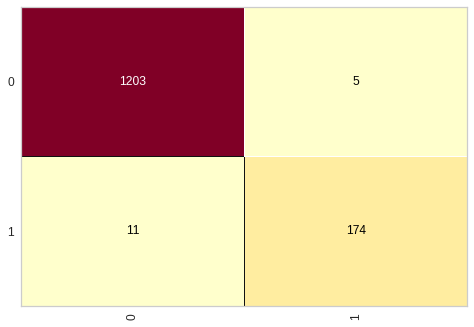

In [48]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(training_data, y_train)
cm.score(testing_data, y_test)

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1208
           1       0.97      0.94      0.96       185

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393



# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
random_forest = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
random_forest.fit(training_data, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [52]:
random_predictions = random_forest.predict(testing_data)

In [53]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, random_predictions)

0.9791816223977028

0.9791816223977028

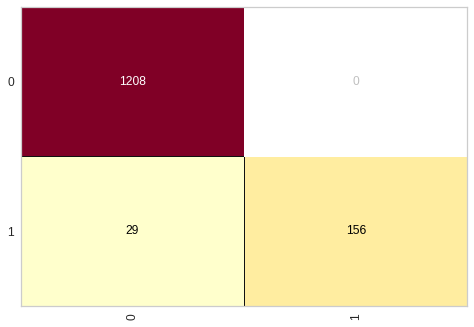

In [54]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest)
cm.fit(training_data, y_train)
cm.score(testing_data, y_test)

In [55]:
print(classification_report(y_test, random_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1208
           1       1.00      0.84      0.91       185

    accuracy                           0.98      1393
   macro avg       0.99      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393

